## 1. EDA
### 1.1 Load data

In [1]:
import pandas as pd

# Load the dataset to examine its structure
file_path = 'cleaned_dataset.csv'
df = pd.read_csv(file_path)

# Get an overview of the dataset: first few rows, column information, and summary statistics
df_info = df.info()
df_head = df.head()
df_description = df.describe()

df_info, df_head, df_description


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9219 entries, 0 to 9218
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            9219 non-null   int64  
 1   PositionTitle                 9219 non-null   object 
 2   Designation                   9219 non-null   object 
 3   Salary                        9219 non-null   int64  
 4   Locations                     9219 non-null   object 
 5   VacancyType                   9219 non-null   object 
 6   EmploymentCategory            9219 non-null   object 
 7   NumberOfVacancies             9219 non-null   float64
 8   NumberOfApplicants            9219 non-null   int64  
 9   NumberOfSuccessfulApplicants  9219 non-null   int64  
 10  Remoteness                    9219 non-null   object 
 11  Region                        9219 non-null   object 
 12  Flexibility                   9219 non-null   object 
 13  Vac

(None,
        id                      PositionTitle                      Designation  \
 0   70031                 Regional Director   SENIOR ADMINISTRATIVE OFFICER 2   
 1   73024             Senior Project Officer         ADMINISTRATIVE OFFICER 7   
 2  153103  Senior Program Governance Officer         ADMINISTRATIVE OFFICER 7   
 3  154461            Senior Dental Assistant                      TECHNICAL 4   
 4  155141         Primary Health Care Nurses                NURSE LEVEL 3 RDO   
 
    Salary                                          Locations  \
 0  154922                                          Katherine   
 1  118256                                             Darwin   
 2  118256                                             Darwin   
 3   91927                                             Darwin   
 4  109710  Alcoota (Engawala), Ali Curung (Alekarenge), C...   
 
                        VacancyType  \
 0    Fixed (Temporary) - Part Time   
 1    Fixed (Temporary) - Ful

### 1.2 Descriptive data & Visualise distribution

In [2]:
# Descriptive statistics for numerical columns
numerical_cols = ['Salary', 'NumberOfVacancies', 'NumberOfApplicants', 'NumberOfSuccessfulApplicants', 'ApplicantSuccessRate']
numerical_description = df[numerical_cols].describe().round(2)
numerical_description

,Salary,NumberOfVacancies,NumberOfApplicants,NumberOfSuccessfulApplicants,ApplicantSuccessRate
count,9219.00,9219.00,9219.00,9219.00,9219.00
mean,113333.98,1.26,15.62,0.83,0.63
std,38559.19,3.06,31.79,2.83,0.54
min,24000.00,1.00,0.00,0.00,0.00
25%,88290.00,1.00,3.00,0.00,0.00
50%,103447.00,1.00,9.00,1.00,1.00
75%,133553.00,1.00,18.00,1.00,1.00
max,383864.00,201.00,1403.00,200.00,8.00


- Salary: Ranges from $24,000 to $383,864, with a mean of $113,360. The distribution of salary suggests that most jobs offer salaries around the $88,000 - $133,000 range.
- Number of Vacancies: Most jobs only have one vacancy, though some postings have up to 201 vacancies.
- Number of Applicants: On average, jobs receive about 15 applicants, but some listings receive over 1400 applicants.
- Number of Successful Applicants: Most jobs hire 1 successful applicant, with some exceptions hiring a large number (up to 200).
- Applicant Success Rate: Varies widely, with a mean success rate of around 11%. Many jobs have a low success rate, indicating competitive hiring.

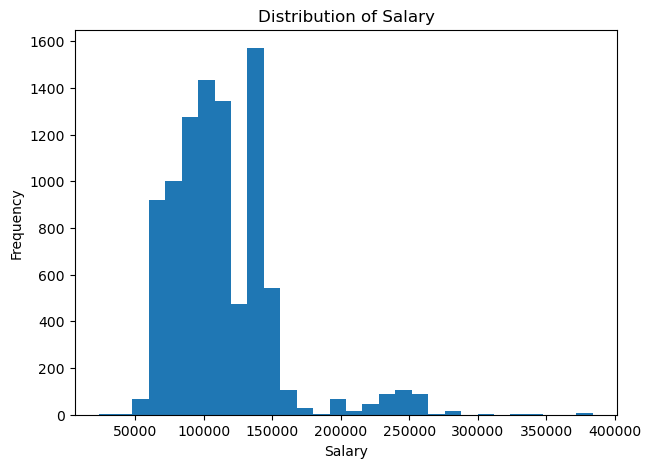

In [3]:
import matplotlib.pyplot as plt

# Plot distribution of Salary
plt.figure(figsize=(7, 5))
df['Salary'].plot(kind='hist', bins=30, title='Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

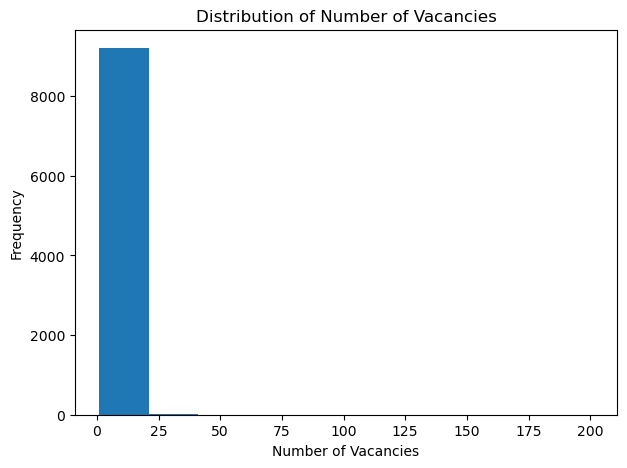

In [4]:
# Plot distribution of Number of Vacancies
plt.figure(figsize=(7,5))
df['NumberOfVacancies'].plot(kind='hist', bins=10, title='Distribution of Number of Vacancies')
plt.xlabel('Number of Vacancies')
plt.ylabel('Frequency')
plt.show()

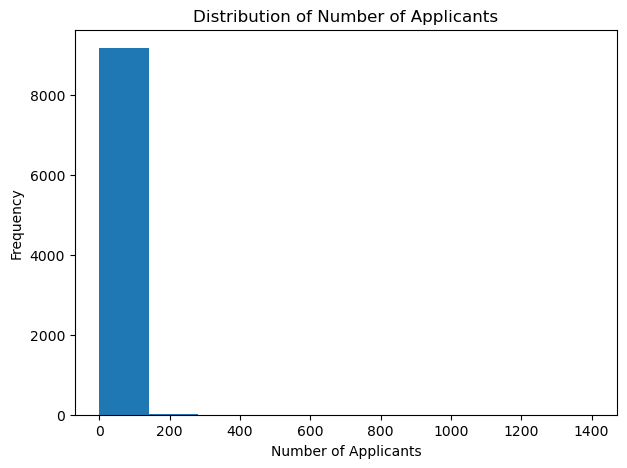

In [5]:
# Plot distribution of Number of Applicants
plt.figure(figsize=(7, 5))
df['NumberOfApplicants'].plot(kind='hist', bins=10, title='Distribution of Number of Applicants')
plt.xlabel('Number of Applicants')
plt.ylabel('Frequency')
plt.show()

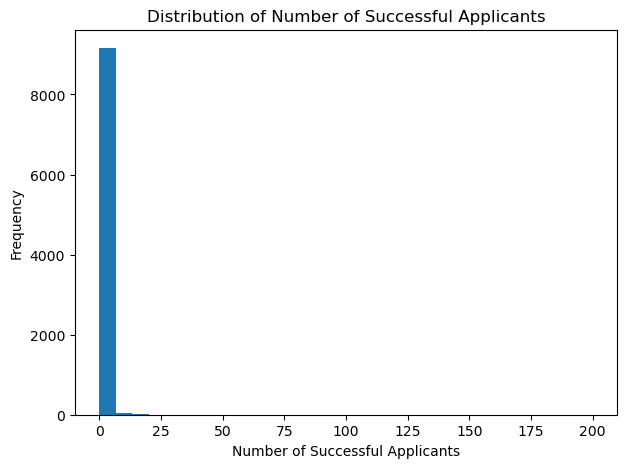

In [6]:
# Plot distribution of Number of Successful Applicants
plt.figure(figsize=(7, 5))
df['NumberOfSuccessfulApplicants'].plot(kind='hist', bins=30, title='Distribution of Number of Successful Applicants')
plt.xlabel('Number of Successful Applicants')
plt.ylabel('Frequency')
plt.show()

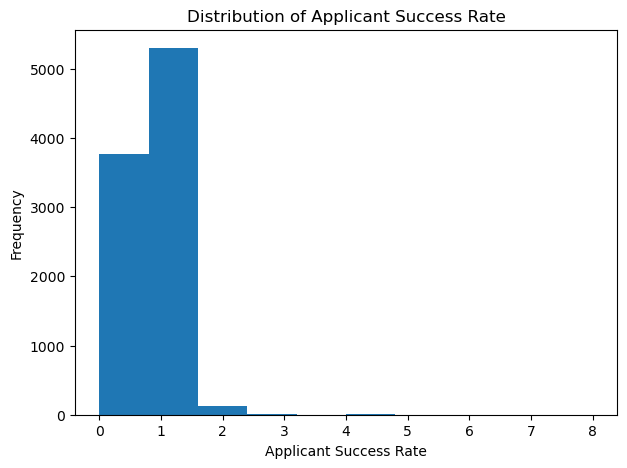

In [7]:
# Plot distribution of Applicant Success Rate
plt.figure(figsize=(7, 5))
df['ApplicantSuccessRate'].plot(kind='hist', bins=10, title='Distribution of Applicant Success Rate')
plt.xlabel('Applicant Success Rate')
plt.ylabel('Frequency')
plt.show()

### 1.3 Most common jobs/ vacancy types/ department

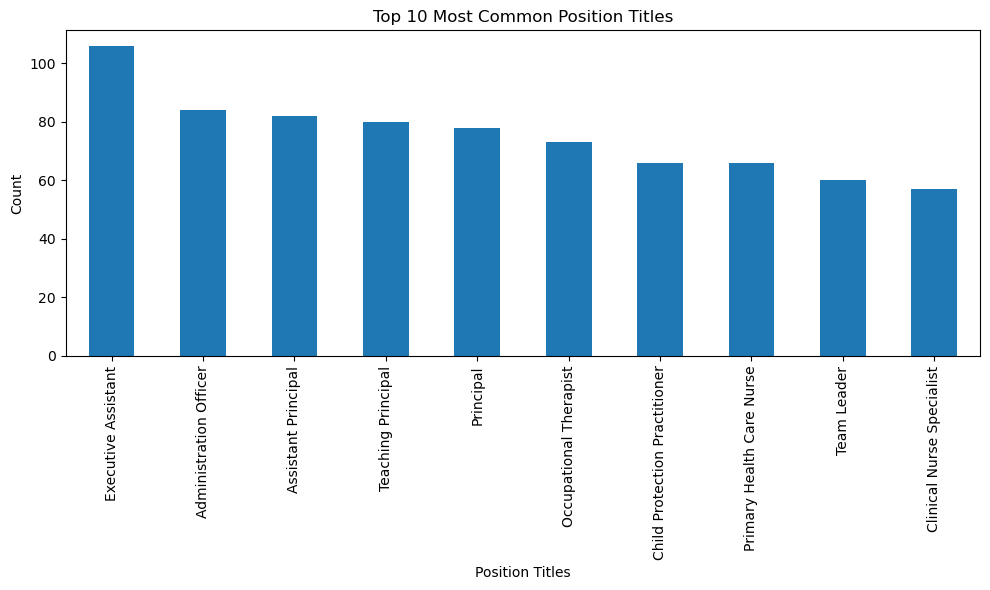

In [8]:
# Visualizing the distribution of categorical variables
categorical_cols = ['PositionTitle', 'Designation', 'Locations', 'Region', 'Department']

# Bar chart for top 10 common Position Titles
top_positions = df['PositionTitle'].value_counts().nlargest(10)

# Creating a bar plot for categorical variable: PositionTitle
fig, ax = plt.subplots(figsize=(10, 6))
top_positions.plot(kind='bar', ax=ax, title='Top 10 Most Common Position Titles')
ax.set_xlabel('Position Titles')
ax.set_ylabel('Count')

plt.tight_layout()

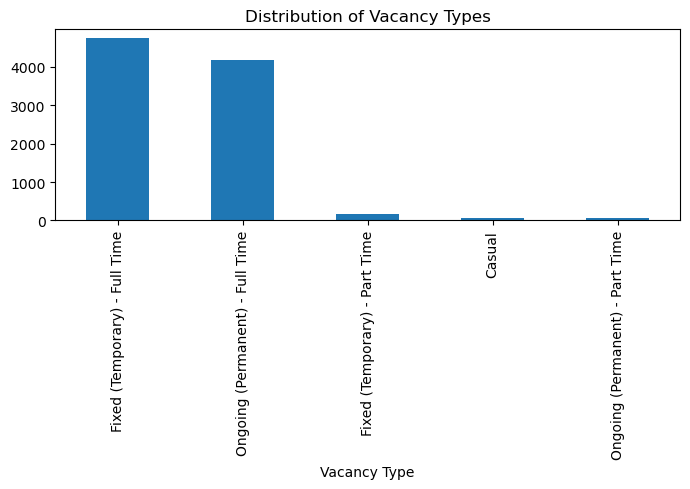

In [9]:
fig, ax = plt.subplots(figsize=(7, 5))

# Bar chart for VacancyType
df['VacancyType'].value_counts().plot(kind='bar', ax=ax, title='Distribution of Vacancy Types')

# Set labels
ax.set_xlabel('Vacancy Type')
ax.set_ylabel('')

plt.tight_layout()
plt.show()


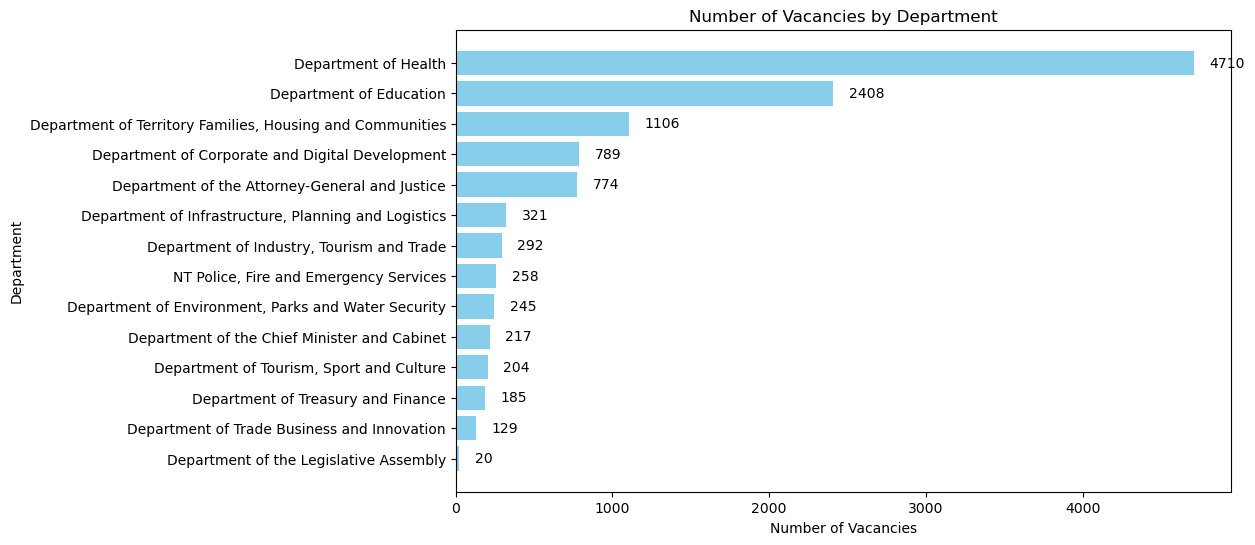

In [10]:
# Group the data by 'Department' and sum the 'NumberOfVacancies' to find the department with the most vacancies
department_vacancies = df.groupby('Department')['NumberOfVacancies'].sum().reset_index()

# Sort by the number of vacancies in descending order
department_vacancies_sorted = department_vacancies.sort_values(by='NumberOfVacancies', ascending=False)

# Plot the top departments with the most vacancies in a bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(department_vacancies_sorted['Department'], department_vacancies_sorted['NumberOfVacancies'], color='skyblue')
plt.xlabel('Number of Vacancies')
plt.ylabel('Department')
plt.title('Number of Vacancies by Department')

# Add numbers to the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 100, bar.get_y() + bar.get_height() / 2, f'{int(width)}', va='center')

plt.gca().invert_yaxis()
plt.show()


### 1.3 Correlation Analysis (numeric & categorical data)

#### 1.3.1 Numeric columns

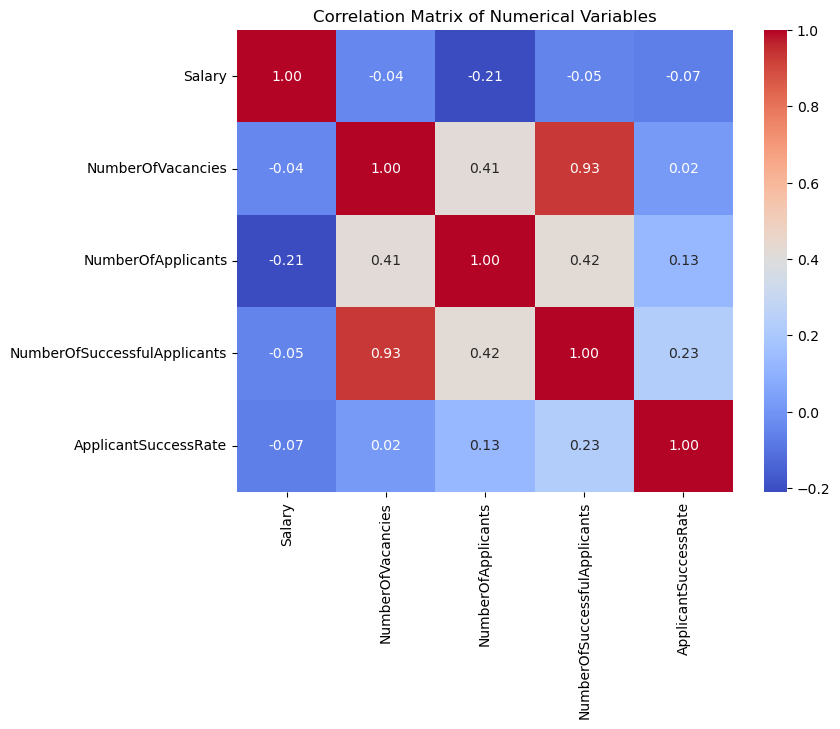

,Salary,NumberOfVacancies,NumberOfApplicants,NumberOfSuccessfulApplicants,ApplicantSuccessRate
Salary,1.000000,-0.043913,-0.210228,-0.051040,-0.066207
NumberOfVacancies,-0.043913,1.000000,0.414720,0.930131,0.018929
NumberOfApplicants,-0.210228,0.414720,1.000000,0.419524,0.126456
NumberOfSuccessfulApplicants,-0.051040,0.930131,0.419524,1.000000,0.227832
ApplicantSuccessRate,-0.066207,0.018929,0.126456,0.227832,1.000000


In [11]:
# Correlation analysis between numerical columns
correlation_matrix = df[numerical_cols].corr()

# Plotting the correlation matrix
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

correlation_matrix

#### 1.3.2 Categorical Data

In [12]:
from scipy.stats import chi2_contingency

# Load the dataset to explore its contents
file_path = 'encoded_dataset.csv'
data = pd.read_csv(file_path)

# Identify categorical variables (those with a low number of unique values, assuming these are encoded)
categorical_columns = data.columns[data.nunique() < 10]

# Perform chi-square tests for the categorical variables against 'Success'
chi_square_results = []

for column in categorical_columns:
    contingency_table = pd.crosstab(data[column], data['Success'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi_square_results.append({
        'Variable': column,
        'Chi2 Statistic': chi2,
        'p-value': p
    })

# Convert results to a DataFrame for better readability
chi_square_df = pd.DataFrame(chi_square_results)
chi_square_df_sorted = chi_square_df.sort_values(by='Chi2 Statistic', ascending=False)

chi_square_df_sorted

,Variable,Chi2 Statistic,p-value
51,Success,9214.736717,0.000000e+00
50,VacancyType,191.029809,3.184185e-40
1,Remoteness,86.168953,1.943791e-19
2,Region,79.213560,1.225614e-15
3,Vacancy6MonthsOrLess,76.896902,1.801194e-18
9,Medical,61.703381,3.992941e-15
30,Administration and Business Services,20.540078,5.839568e-06
36,Accounting and Finance,19.493855,1.009238e-05
39,Nursing and Midwifery,17.646377,2.660215e-05
17,Information and Communication Technology (ICT),15.361103,8.879756e-05


In [13]:
# Filter out the features with p-values greater than 0.05
significant_features_df = chi_square_df[chi_square_df['p-value'] <= 0.05]
significant_features_df_sorted = significant_features_df.sort_values(by='Chi2 Statistic', ascending=False)

significant_features_df_sorted


,Variable,Chi2 Statistic,p-value
51,Success,9214.736717,0.000000e+00
50,VacancyType,191.029809,3.184185e-40
1,Remoteness,86.168953,1.943791e-19
2,Region,79.213560,1.225614e-15
3,Vacancy6MonthsOrLess,76.896902,1.801194e-18
9,Medical,61.703381,3.992941e-15
30,Administration and Business Services,20.540078,5.839568e-06
36,Accounting and Finance,19.493855,1.009238e-05
39,Nursing and Midwifery,17.646377,2.660215e-05
17,Information and Communication Technology (ICT),15.361103,8.879756e-05


### 1.4 Flexibility, Remoteness & Department-based analysis
How Flexibility and Remoteness affect Salary, Number of Applicants, and Applicant Success Rate

In [14]:
# Grouping by Flexibility and calculating average Salary, NumberOfApplicants, and ApplicantSuccessRate
flexibility_group = df.groupby('Flexibility')[['Salary', 'NumberOfApplicants', 'ApplicantSuccessRate']].mean().round(3)

flexibility_group


,Salary,NumberOfApplicants,ApplicantSuccessRate
Flexibility,,,
No,113800.022,14.994,0.637
Yes,106825.292,24.312,0.555


Flexibility-Based Analysis:
- Jobs that offer flexibility have a slightly lower average salary ($106,990) compared to those without flexibility ($113,814).
- However, flexible jobs attract more applicants on average (24.3 applicants vs. 15 applicants for non-flexible jobs).
- Flexible jobs also have a higher applicant success rate (0.14) compared to non-flexible jobs (0.11), which suggests that jobs with flexibility might provide better chances for applicants.

In [15]:
# Grouping by Remoteness and calculating average Salary, NumberOfApplicants, and ApplicantSuccessRate
remoteness_group = df.groupby('Remoteness')[['Salary', 'NumberOfApplicants', 'ApplicantSuccessRate']].mean().round(3)
remoteness_group

,Salary,NumberOfApplicants,ApplicantSuccessRate
Remoteness,,,
Outer Regional,115678.099,19.787,0.675
Remote,107299.309,7.831,0.535
Very Remote,110641.951,8.908,0.573


Remoteness-Based Analysis:
- Outer Regional jobs have the highest average salary ($115,714) but also the lowest applicant success rate (0.095), indicating more competition.
- Remote and Very Remote jobs offer lower salaries, but they have significantly fewer applicants, resulting in higher success rates (0.138 for remote jobs and 0.156 for very remote jobs).

In [16]:
# Let's explore Department distribution and how it relates to Salary and Success Rates
department_group = df.groupby('Department')[['Salary', 'ApplicantSuccessRate']].mean().round(3).sort_values(by='ApplicantSuccessRate', ascending=False)

department_group

,Salary,ApplicantSuccessRate
Department,,
Department of Treasury and Finance,130684.927,0.818
"Department of Tourism, Sport and Culture",96368.041,0.788
"Department of Infrastructure, Planning and Logistics",107608.767,0.738
Department of Trade Business and Innovation,121471.710,0.738
Department of Corporate and Digital Development,105464.967,0.697
Department of the Chief Minister and Cabinet,119107.982,0.696
Department of the Attorney-General and Justice,102111.837,0.682
Department of the Legislative Assembly,103160.350,0.650
"Department of Environment, Parks and Water Security",99513.376,0.644


Department-wise Salary and Success Rate Analysis:
- The Department of Treasury and Finance offers the highest average salary (\$130,684) but has a relatively low applicant success rate (0.075), suggesting these roles may be more specialized or competitive.
- The Department of Trade, Business, and Innovation also offers a high salary (\$121,471) but has one of the lowest success rates (0.047).
- Department of Health offers high salaries (\$119,765) and has a much higher success rate (0.157), indicating better hiring prospects compared to other departments.

### 1.5 Clustering

C:\Users\LENOVO\anaconda3\envs\hit140env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\LENOVO\anaconda3\envs\hit140env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\LENOVO\anaconda3\envs\hit140env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\LENOVO\anaconda3\envs\hit140env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

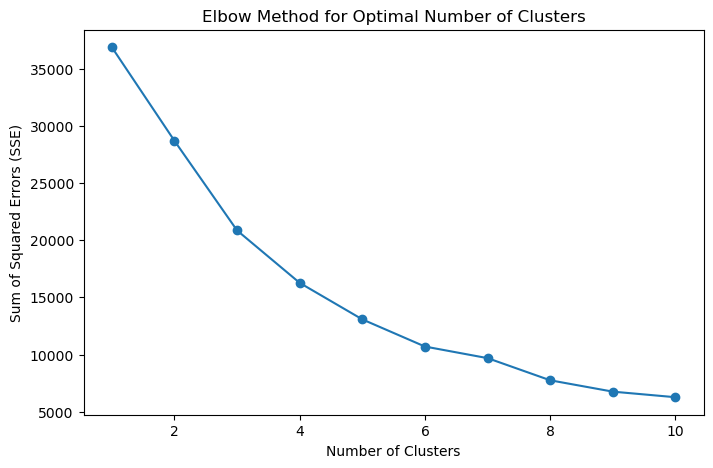

In [17]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# Selecting relevant numerical features for clustering
cluster_features = df[['Salary', 'NumberOfVacancies', 'NumberOfApplicants', 'ApplicantSuccessRate']]

# Handling missing values by filling with mean values
cluster_features = cluster_features.fillna(cluster_features.mean())

# Standardizing the features
scaler = StandardScaler()
cluster_features_scaled = scaler.fit_transform(cluster_features)

# Determining the optimal number of clusters using the elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cluster_features_scaled)
    sse.append(kmeans.inertia_)

# Plotting the elbow curve to identify the best number of clusters
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

The optimal number of clusters is around 3.

C:\Users\LENOVO\anaconda3\envs\hit140env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


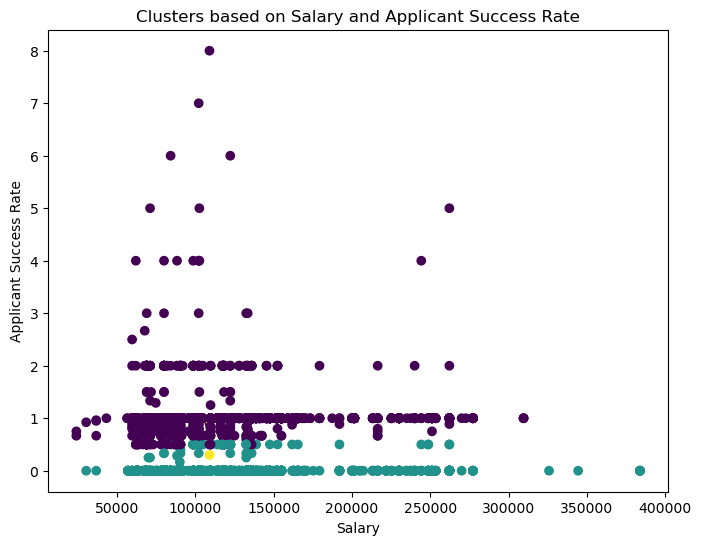

In [18]:
numeric_cols = ['Salary', 'NumberOfVacancies', 'NumberOfApplicants', 'ApplicantSuccessRate']
cluster_features = df[numeric_cols].apply(pd.to_numeric, errors='coerce').fillna(df[numeric_cols].mean())

scaler = StandardScaler()
cluster_features_scaled = scaler.fit_transform(cluster_features)

# Apply K-means clustering with 3 clusters
kmeans_3_clusters = KMeans(n_clusters=3, random_state=42)
clusters_3 = kmeans_3_clusters.fit_predict(cluster_features_scaled)

df['Cluster'] = clusters_3

# Visualize the clusters based on Salary and Applicant Success Rate
plt.figure(figsize=(8, 6))
plt.scatter(df['Salary'], df['ApplicantSuccessRate'], c=clusters_3, cmap='viridis', marker='o')
plt.title('Clusters based on Salary and Applicant Success Rate')
plt.xlabel('Salary')
plt.ylabel('Applicant Success Rate')
plt.show()

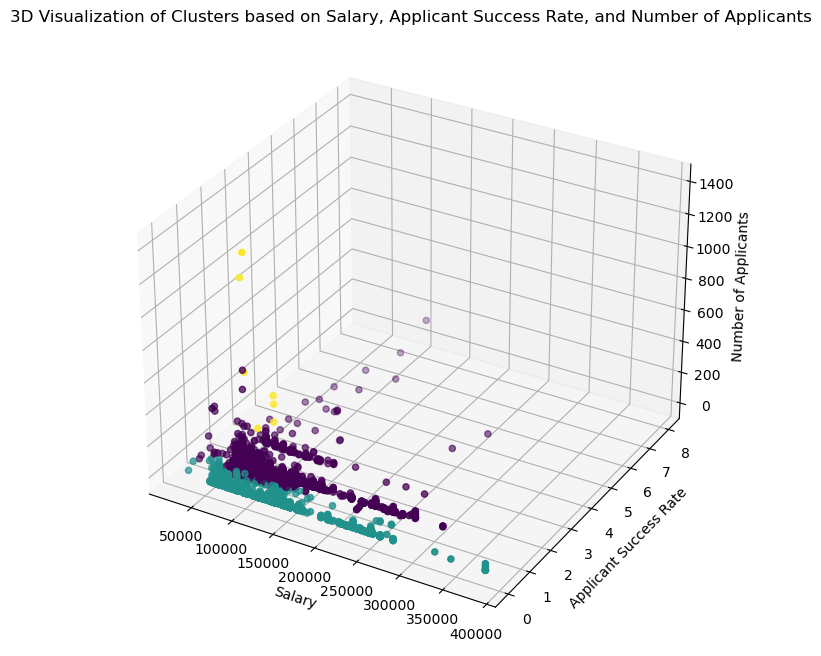

In [20]:
from mpl_toolkits.mplot3d import Axes3D

# Setting up the 3D plot for visualizing 3 clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Extracting relevant features for the 3D plot (Salary, Applicant Success Rate, and Number of Applicants)
ax.scatter(df['Salary'], df['ApplicantSuccessRate'], df['NumberOfApplicants'], c=clusters_3, cmap='viridis')

# Adding labels to the axes
ax.set_xlabel('Salary')
ax.set_ylabel('Applicant Success Rate')
ax.set_zlabel('Number of Applicants')

plt.title('3D Visualization of Clusters based on Salary, Applicant Success Rate, and Number of Applicants')
plt.show()


Low-Salary, High Applicant Jobs (Purple Cluster):
- This cluster groups jobs with lower salaries (mostly below $150,000) and a high number of applicants. The applicant success rate is generally lower, which indicates that these jobs attract more applicants, leading to higher competition.

Mid-to-High Salary Jobs (Teal Cluster):
- This cluster contains a wider salary range (up to $300,000) and covers both high and low numbers of applicants.
These jobs show a more varied applicant success rate, ranging from lower to higher success rates, which may depend on the level of specialization and job requirements.

High-Salary Jobs with High Success Rate (Yellow Cluster):
- Jobs in this cluster offer higher salaries (around $200,000 or more) with relatively lower competition (fewer applicants) and generally higher success rates. This could represent senior-level roles or positions in specialized fields where fewer candidates are qualified.

In [21]:
grouped_Flexibility = df.groupby(['Remoteness', 'Flexibility']).agg(
    total_successful=('NumberOfSuccessfulApplicants', 'sum'),
    total_vacancies=('NumberOfVacancies', 'sum')
)
grouped_Flexibility['RateOfSuccessfulApplicants'] = (grouped_Flexibility['total_successful'] / grouped_Flexibility['total_vacancies']) * 100

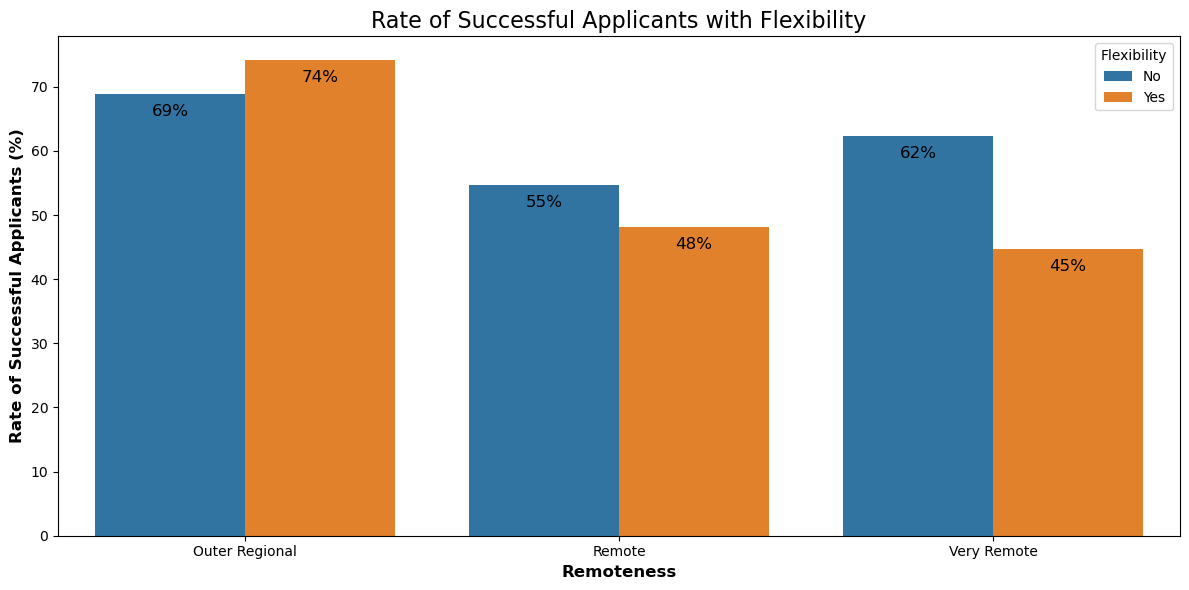

In [23]:
# Extract 'Remoteness' and 'Flexibility' from the index
grouped_Flexibility['Remoteness'] = grouped_Flexibility.index.get_level_values(0)
grouped_Flexibility['Flexibility'] = grouped_Flexibility.index.get_level_values(1)

# Set the figure size
plt.figure(figsize=(12, 6))

# Create the barplot directly from the multi-index DataFrame
bar_plot = sns.barplot(x='Remoteness', y='RateOfSuccessfulApplicants', hue='Flexibility', data=grouped_Flexibility)

# Add title and labels
plt.title('Rate of Successful Applicants with Flexibility', fontsize=16)
plt.xlabel('Remoteness', fontweight='bold', fontsize=12)
plt.ylabel('Rate of Successful Applicants (%)', fontweight='bold', fontsize=12)

# Add percentage labels on top of each bar
for p in bar_plot.patches:
    height = p.get_height()
    bar_plot.annotate(f'{height:.0f}%', 
                      (p.get_x() + p.get_width() / 2., height-5), 
                      ha='center', va='bottom',
                      fontsize=12, color='black', xytext=(0, 5),
                      textcoords='offset points')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [24]:
grouped_Region = df.groupby(['Remoteness', 'Region']).agg(
    total_successful=('NumberOfSuccessfulApplicants', 'sum'),
    total_vacancies=('NumberOfVacancies', 'sum')
)
grouped_Region['RateOfSuccessfulApplicants'] = (grouped_Region['total_successful'] / grouped_Region['total_vacancies']) * 100

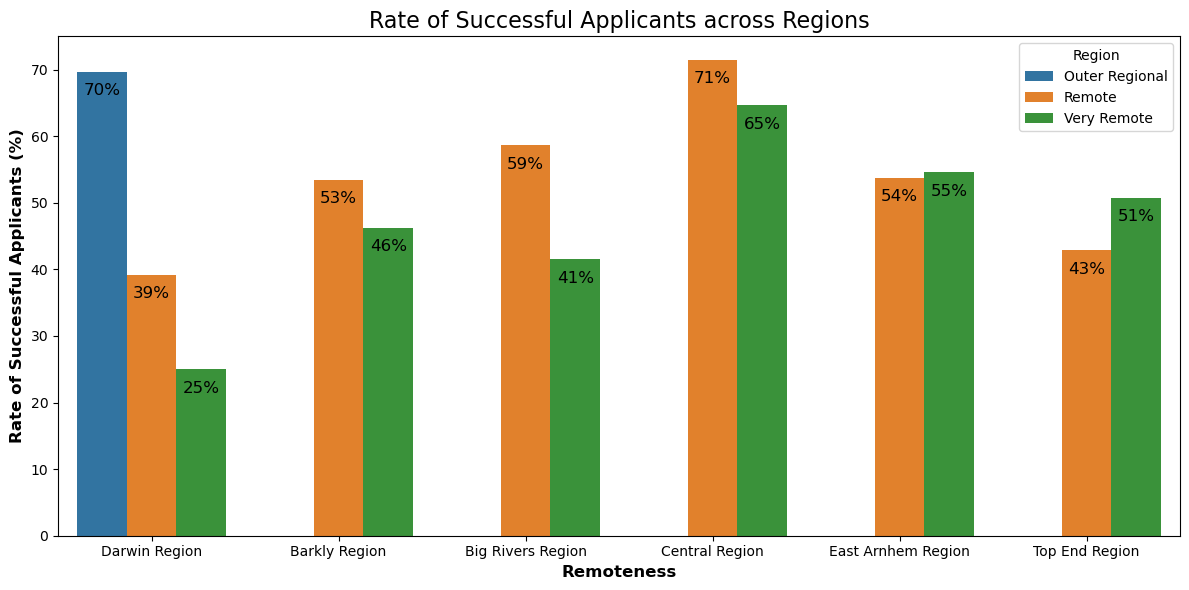

In [25]:
# Extract 'Remoteness' and 'Flexibility' from the index
grouped_Region['Region'] = grouped_Region.index.get_level_values(0)
grouped_Region['Remoteness'] = grouped_Region.index.get_level_values(1)

# Set the figure size
plt.figure(figsize=(12, 6))

# Create the barplot directly from the multi-index DataFrame
bar_plot = sns.barplot(x='Remoteness', y='RateOfSuccessfulApplicants', hue='Region', data=grouped_Region)

# Add title and labels
plt.title('Rate of Successful Applicants across Regions', fontsize=16)
plt.xlabel('Remoteness', fontweight='bold', fontsize=12)
plt.ylabel('Rate of Successful Applicants (%)', fontweight='bold', fontsize=12)

# Add percentage labels on top of each bar
for p in bar_plot.patches:
    height = p.get_height()
    bar_plot.annotate(f'{height:.0f}%', 
                      (p.get_x() + p.get_width() / 2., height-5), 
                      ha='center', va='bottom',
                      fontsize=12, color='black', xytext=(0, 5),
                      textcoords='offset points')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [26]:
grouped_Salary = df.groupby(['Remoteness']).agg(
    total_successful=('NumberOfSuccessfulApplicants', 'sum'),
    total_vacancies=('NumberOfVacancies', 'sum'),
    avg_salary=('Salary', 'mean')
)
grouped_Salary['RateOfSuccessfulApplicants'] = (grouped_Salary['total_successful'] / grouped_Salary['total_vacancies']) * 100
print(grouped_Salary)

                total_successful  total_vacancies     avg_salary  \
Remoteness                                                         
Outer Regional              5159           7401.0  115678.098831   
Remote                       878           1643.0  107299.309471   
Very Remote                 1617           2614.0  110641.951456   

                RateOfSuccessfulApplicants  
Remoteness                                  
Outer Regional                   69.706796  
Remote                           53.438831  
Very Remote                      61.859220  


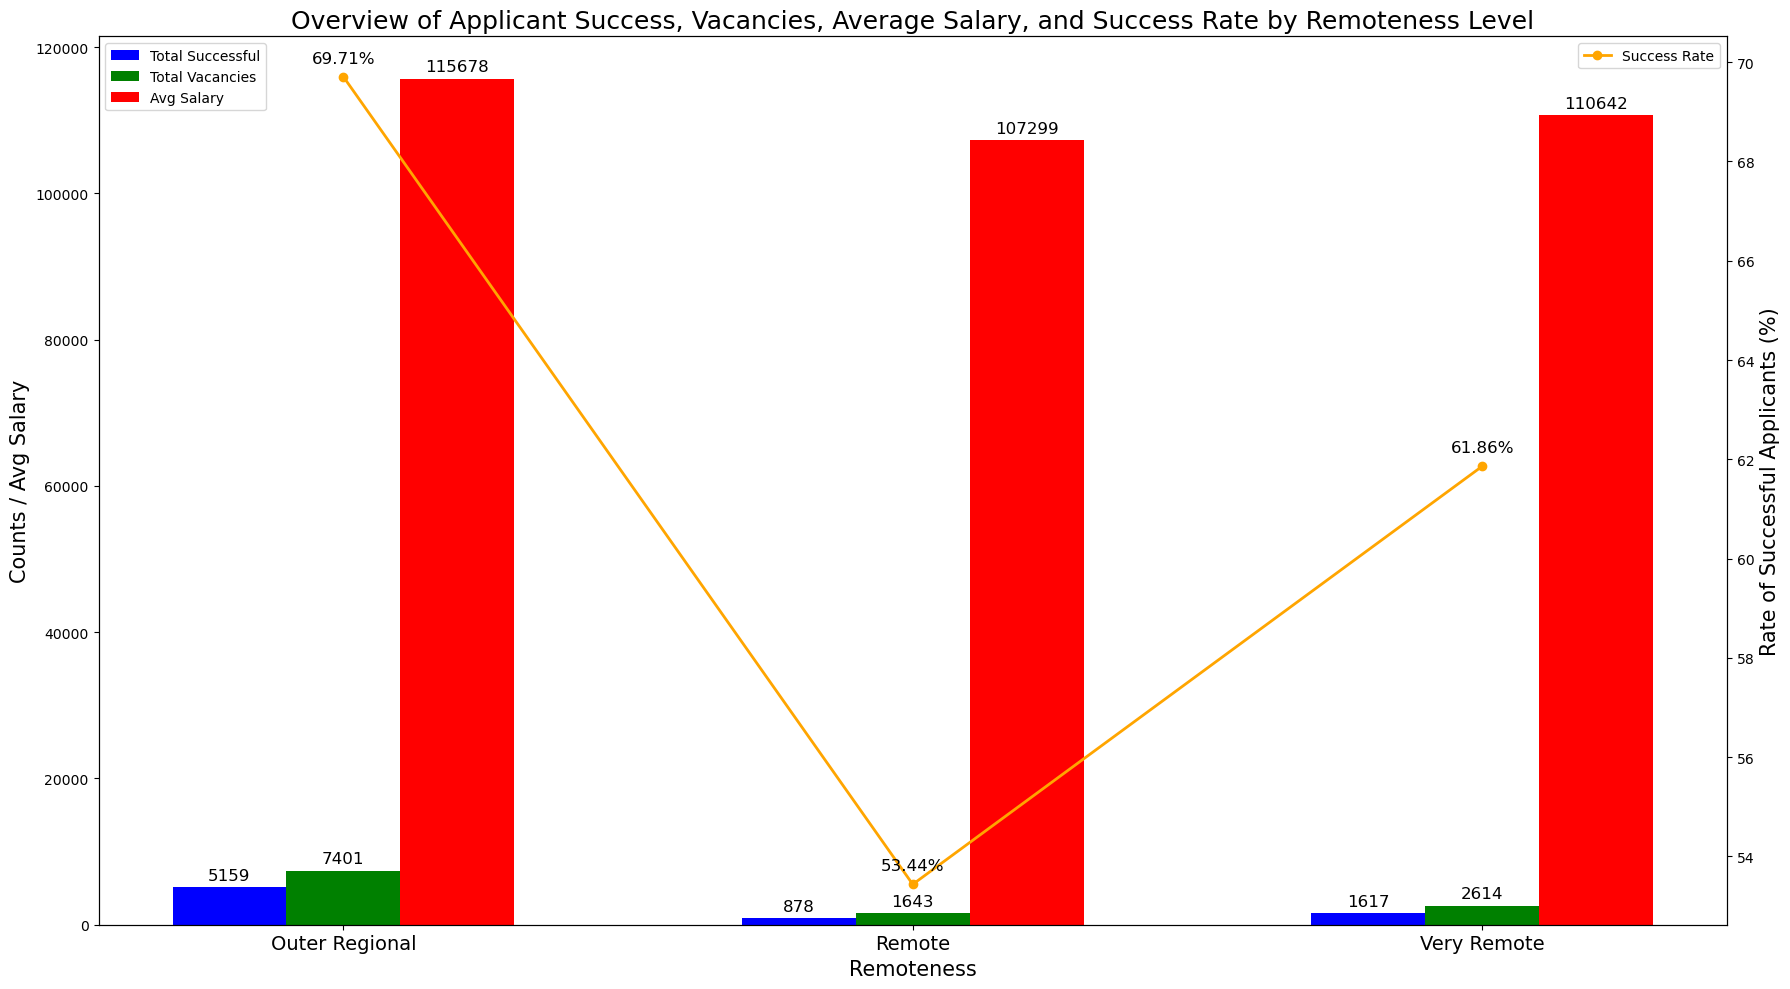

In [27]:
# Define the figure and axis
fig, ax1 = plt.subplots(figsize=(18, 10))

# X axis labels
remoteness = grouped_Salary.index

# Set bar width
bar_width = 0.2

# Positions for each bar group
bar1 = np.arange(len(remoteness))
bar2 = [x + bar_width for x in bar1]
bar3 = [x + bar_width for x in bar2]

# Bar chart for total_successful, total_vacancies, and avg_salary
bars1 = ax1.bar(bar1, grouped_Salary['total_successful'], width=bar_width, label='Total Successful', color='b')
bars2 = ax1.bar(bar2, grouped_Salary['total_vacancies'], width=bar_width, label='Total Vacancies', color='g')
bars3 = ax1.bar(bar3, grouped_Salary['avg_salary'], width=bar_width, label='Avg Salary', color='r')

# Customize the first axis
ax1.set_xlabel('Remoteness', fontsize=15)
ax1.set_ylabel('Counts / Avg Salary', fontsize=15)
ax1.set_title('Overview of Applicant Success, Vacancies, Average Salary, and Success Rate by Remoteness Level', fontsize=18)
ax1.set_xticks([r + bar_width for r in range(len(remoteness))])
ax1.set_xticklabels(remoteness, fontsize=14)
ax1.legend(loc='upper left')

for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax1.annotate(f'{height:.0f}', 
                     xy=(bar.get_x() + bar.get_width() / 2, height-2),
                     xytext=(0, 3),  # Offset the label slightly above the bar
                     textcoords="offset points", ha='center',fontsize=12, va='bottom')
# Create a second y-axis for the rate of successful applicants
ax2 = ax1.twinx()
ax2.plot(bar1 + bar_width, grouped_Salary['RateOfSuccessfulApplicants'], color='orange', marker='o', label='Success Rate', linewidth=2)

# Customize the second axis
ax2.set_ylabel('Rate of Successful Applicants (%)', fontsize=15)
ax2.legend(loc='upper right')

# Add data labels to the line chart
for i, txt in enumerate(grouped_Salary['RateOfSuccessfulApplicants']):
    ax2.annotate(f'{txt:.2f}%', (bar1[i] + bar_width, grouped_Salary['RateOfSuccessfulApplicants'][i]), 
                 textcoords="offset points", xytext=(0, 10),fontsize=12, ha='center')
# Display the plot
plt.tight_layout()
plt.show()

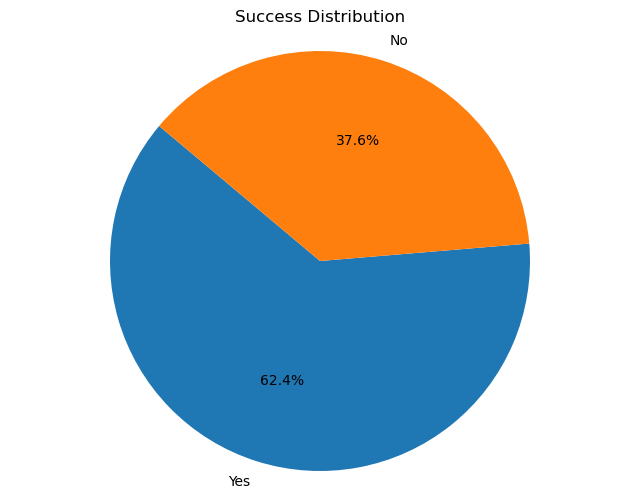

In [28]:
success_counts = df['Success'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(success_counts, labels=success_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Success Distribution')
plt.axis('equal') 
plt.show()